In this tutorial, we will see how to segment objects from a background. We start off with the coins image from skimage.data. This image shows several coins outlined against a darker background. The segmentation of the coins cannot be done directly from the histogram of grey values, because the background shares enough grey levels with the coins that a thresholding segmentation is not sufficient. For this we will use grid_to_graph for feature extraction.

https://scikit-learn.org/stable/auto_examples/cluster/plot_coin_ward_segmentation.html#sphx-glr-auto-examples-cluster-plot-coin-ward-segmentation-py

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import coins
from sklearn.cluster import AgglomerativeClustering

from scipy.ndimage.filters import gaussian_filter
from skimage.transform import rescale

In [2]:
original_coins = coins()

In [3]:
original_coins.shape

(303, 384)

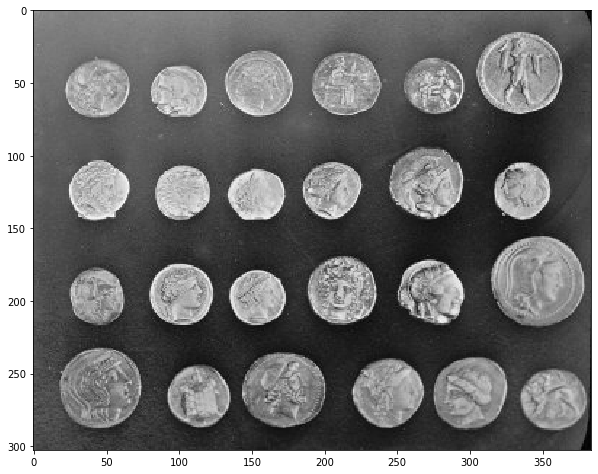

In [4]:
plt.figure(figsize=(10,20))

plt.imshow(original_coins, cmap=plt.cm.gray)

plt.show()

Applying a Gaussian filter for smoothing prior to down-scaling reduces aliasing artifacts

In [5]:
smoothened_coins = gaussian_filter(original_coins, sigma=2)

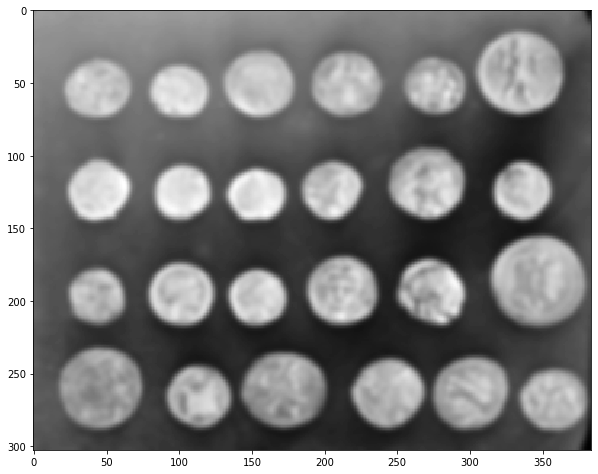

In [6]:
plt.figure(figsize=(10, 20))

plt.imshow(smoothened_coins, cmap=plt.cm.gray)

plt.show()

Resize it to 20% of the original size to speed up the processing

In [7]:
rescaled_coins = rescale(smoothened_coins, 0.2, 
                         mode="reflect", 
                         multichannel=False, 
                         anti_aliasing=False)

rescaled_coins.shape

(61, 77)

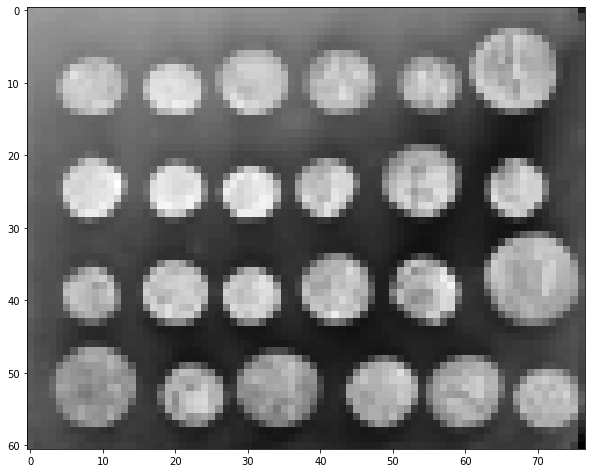

In [8]:
plt.figure(figsize=(10,20))
plt.imshow(rescaled_coins, cmap=plt.cm.gray)

plt.show()

In [10]:
X = np.reshape(rescaled_coins, (-1, 1))

X.shape

(4697, 1)

#### grid_to_graph   
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.image.grid_to_graph.html#sklearn.feature_extraction.image.grid_to_graph      

Graph of the pixel-to-pixel connections

In [11]:
from sklearn.feature_extraction import image

#### Construct a grid of pixels
The number of pixels is 61x77 = 4,697

In [12]:
connectivity = image.grid_to_graph(*rescaled_coins.shape)

print(connectivity)

  (0, 1)	1
  (1, 2)	1
  (2, 3)	1
  (3, 4)	1
  (4, 5)	1
  (5, 6)	1
  (6, 7)	1
  (7, 8)	1
  (8, 9)	1
  (9, 10)	1
  (10, 11)	1
  (11, 12)	1
  (12, 13)	1
  (13, 14)	1
  (14, 15)	1
  (15, 16)	1
  (16, 17)	1
  (17, 18)	1
  (18, 19)	1
  (19, 20)	1
  (20, 21)	1
  (21, 22)	1
  (22, 23)	1
  (23, 24)	1
  (24, 25)	1
  :	:
  (4672, 4672)	1
  (4673, 4673)	1
  (4674, 4674)	1
  (4675, 4675)	1
  (4676, 4676)	1
  (4677, 4677)	1
  (4678, 4678)	1
  (4679, 4679)	1
  (4680, 4680)	1
  (4681, 4681)	1
  (4682, 4682)	1
  (4683, 4683)	1
  (4684, 4684)	1
  (4685, 4685)	1
  (4686, 4686)	1
  (4687, 4687)	1
  (4688, 4688)	1
  (4689, 4689)	1
  (4690, 4690)	1
  (4691, 4691)	1
  (4692, 4692)	1
  (4693, 4693)	1
  (4694, 4694)	1
  (4695, 4695)	1
  (4696, 4696)	1


In [13]:
connectivity.shape

(4697, 4697)

In [14]:
connectivity.toarray()

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 1, 1]])

#### View the image connections
Consider a 4x4 image. The top left pixel is #0. This is connected to itself (#0), the pixel to it's right (#1) and the one below it (#4). So for the first row which represents connections of pixel #0, the values at index 0,1,4 are all 1

In [15]:
image.grid_to_graph(4, 4).toarray()

array([[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]])

### AgglomerativeClustering
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

Experiment with different values for n_clusters. For example, if it is set to 31, there is one cluster created for each of the 24 coins plus a few other clusters

In [20]:
n_clusters=25

agglo = AgglomerativeClustering(n_clusters=n_clusters, 
                                connectivity=connectivity)

agglo.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=<4697x4697 sparse matrix of type '<class 'numpy.int64'>'
	with 23209 stored elements in COOrdinate format>,
                        distance_threshold=None, linkage='ward', memory=None,
                        n_clusters=25, pooling_func='deprecated')

In [21]:
label = np.reshape(agglo.labels_, rescaled_coins.shape)

label

array([[0, 0, 0, ..., 0, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

In [22]:
label.shape

(61, 77)

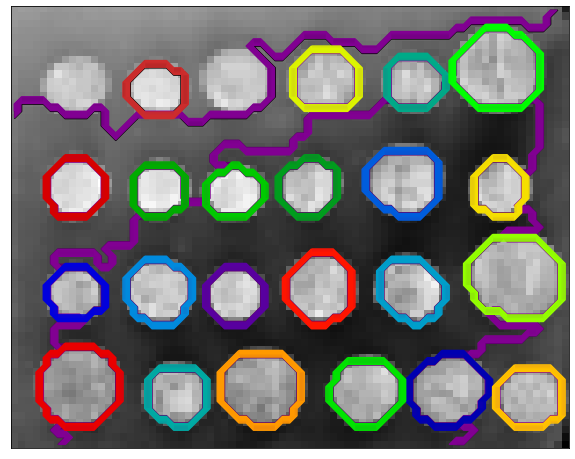

In [23]:
plt.figure(figsize=(10, 20))
plt.imshow(rescaled_coins, cmap=plt.cm.gray)

for l in range(n_clusters):
    plt.contour(label == l, colors=[plt.cm.nipy_spectral(l / float(n_clusters)), ])
    
plt.xticks(())
plt.yticks(())
plt.show()